# ${}^{4}{\rm He}$

The interaction is defined in `helium4.py`. It is local, and so is the counterterm. We will use it to tune the scattering length over a range of short-distance cutoffs, $R$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.interpolate import interp1d

import mu2

import helium4plusplus as he4

In [2]:
ELL = 0
R_MAX = he4.BETA6/2
R_MIN = he4.BETA6/8
N1 = 6
NUM_STATES = 5

nR = 50
Rs = 2/np.linspace(2/R_MAX, 2/R_MIN, nR)

gs = np.empty(nR)
b2s = np.empty(nR)
r0s = np.empty(nR)

In [3]:
momenta = np.linspace(0.01/he4.BETA6, 0.1/he4.BETA6, 30)
X = he4.FACTOR * he4.BETA6 # K•Å^3

def inverse_a0_diff(g, sys):
    a0 = -1/sys.kcotd_gen_fast([0], g, 0)[0]
    return (1/he4.A0 - 1/a0)*he4.A0


def a0_and_r0(g, sys):
    a0 = -1/sys.kcotd_gen_fast([0], g, 0)[0]
    kcd = sys.kcotd_gen_fast(momenta, g, 0)
    r0 = 2*np.gradient(kcd, momenta**2)[0]
    return a0, r0

In [4]:
Ri = Rs[0]
s = he4.LocalHelium4System(Ri, ELL, N1)

In [12]:
guess = -308
inverse_a0_diff(guess, s), s.bound_state_spectrum(guess, 0)

(-0.07417135724111218,
 array([-1.51781640e-03, -6.63448321e+01, -1.61475365e+02, -2.46234005e+02,
        -3.10170756e+02]))

In [13]:
systems = []

for i in range(nR):
    R = Rs[i]
    s = he4.LocalHelium4System(R, ELL, N1)
    systems.append(s)
    result = optimize.fsolve(inverse_a0_diff, guess, args=(s), factor=0.1)
    g = result[0]
    a0, r0 = a0_and_r0(g, s)
    
    if np.abs((he4.A0 - a0)/he4.A0) < 1e-4:
        e2s = s.bound_state_spectrum(g, 0)
        n = e2s.size
        if n != NUM_STATES:
            print(f'i = {i} | Number of states is {n}.')
            break
        gs[i] = g
        r0s[i] = r0
        b2s[i] = np.abs(e2s[0])
        print(f'i = {i}  R = {R:.4e}  g = {g/X:.4e} X  a0 = {a0:.4e}  r0 = {r0:.4e}  b2 = {np.abs(e2s[0]):.4e}  n = {n}')

        if i < 5:
            guess = g
        else:
            f = interp1d(Rs[i-5:i+1], gs[i-5:i+1], kind='cubic', fill_value='extrapolate')
            if i < nR-1:
                guess = f(Rs[i+1])

    else:
        break

i = 0  R = 2.7706e+00  g = -4.5851e+00 X  a0 = 1.0000e+02  r0 = 7.2058e+00  b2 = 1.3080e-03  n = 5
i = 1  R = 2.6108e+00  g = -4.7822e+00 X  a0 = 1.0000e+02  r0 = 7.2540e+00  b2 = 1.3087e-03  n = 5
i = 2  R = 2.4684e+00  g = -4.8305e+00 X  a0 = 1.0000e+02  r0 = 7.2810e+00  b2 = 1.3091e-03  n = 5
i = 3  R = 2.3407e+00  g = -4.7352e+00 X  a0 = 1.0000e+02  r0 = 7.2867e+00  b2 = 1.3092e-03  n = 5
i = 4  R = 2.2256e+00  g = -4.5201e+00 X  a0 = 1.0000e+02  r0 = 7.2783e+00  b2 = 1.3091e-03  n = 5
i = 5  R = 2.1213e+00  g = -4.1763e+00 X  a0 = 1.0000e+02  r0 = 7.2660e+00  b2 = 1.3089e-03  n = 5
i = 6  R = 2.0263e+00  g = -3.6590e+00 X  a0 = 1.0000e+02  r0 = 7.2570e+00  b2 = 1.3087e-03  n = 5
i = 7  R = 1.9394e+00  g = -2.9098e+00 X  a0 = 1.0000e+02  r0 = 7.2530e+00  b2 = 1.3087e-03  n = 5
i = 8  R = 1.8597e+00  g = -1.8739e+00 X  a0 = 1.0000e+02  r0 = 7.2518e+00  b2 = 1.3087e-03  n = 5
i = 9  R = 1.7863e+00  g = -5.1133e-01 X  a0 = 1.0000e+02  r0 = 7.2502e+00  b2 = 1.3086e-03  n = 5
i = 10  R 

In [14]:
he4.BETA6/R

7.755102040816326

In [15]:
plt.style.use('science')
gr = 4/3
h = 3

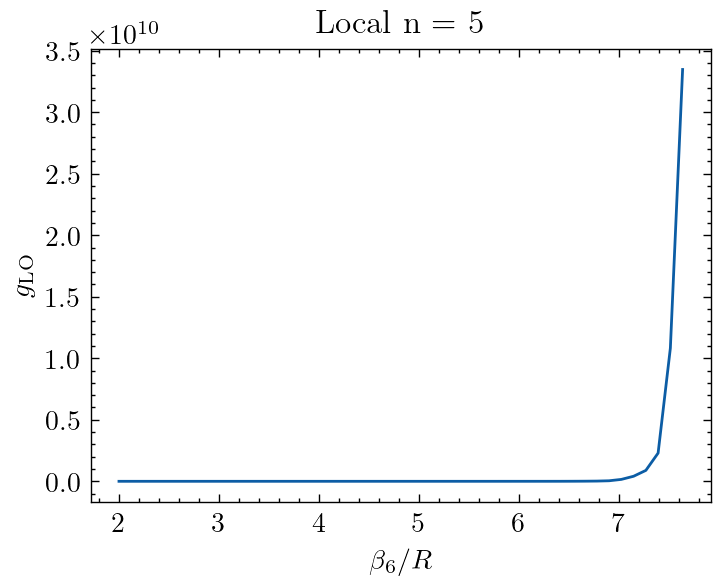

In [16]:
fig, ax = plt.subplots(figsize=(gr*h, h), dpi=200)
fig.patch.set_facecolor('white')

ax.plot(he4.BETA6/Rs[:i], gs[:i])

ax.set_xlabel(r'$\beta_6/R$')
ax.set_ylabel(r'$g_{\rm LO}$')
ax.set_title(rf'Local n = {NUM_STATES}');

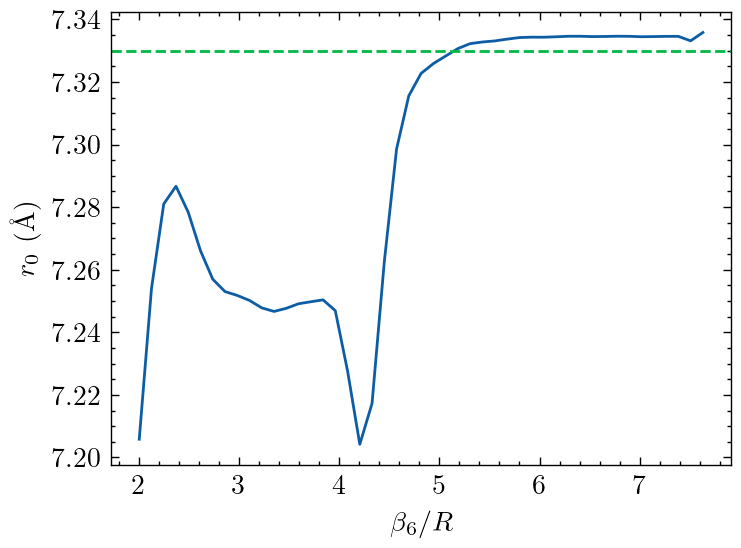

In [17]:
fig, ax = plt.subplots(figsize=(gr*h, h), dpi=200)
fig.patch.set_facecolor('white')

ax.plot(he4.BETA6/Rs[:i], r0s[:i])
ax.axhline(he4.R0, color='C1', linestyle='--')

ax.set_xlabel(r'$\beta_6/R$')
ax.set_ylabel(r'$r_0$ (Å)');

In [18]:
filename_id = f'he4plusplus_LO_local_n_{NUM_STATES}'

In [19]:
np.savetxt('datfiles/'+filename_id + '_rg_flow.txt', np.vstack((Rs[:i], gs[:i])).T, header='R (Å)  g ()')

In [20]:
np.savetxt('datfiles/' + filename_id + '_r0s.txt', np.vstack((Rs[:i], r0s[:i])).T, header='R (Å)  r_0 (Å)')

## Phase Shifts

In [21]:
ks = np.linspace(0.01/he4.BETA6, 2/he4.BETA6, 50)

In [22]:
kcds = np.array([
    s.kcotd_gen_fast(ks, gi, 0) for (s, gi) in zip(systems, gs[:i])
])

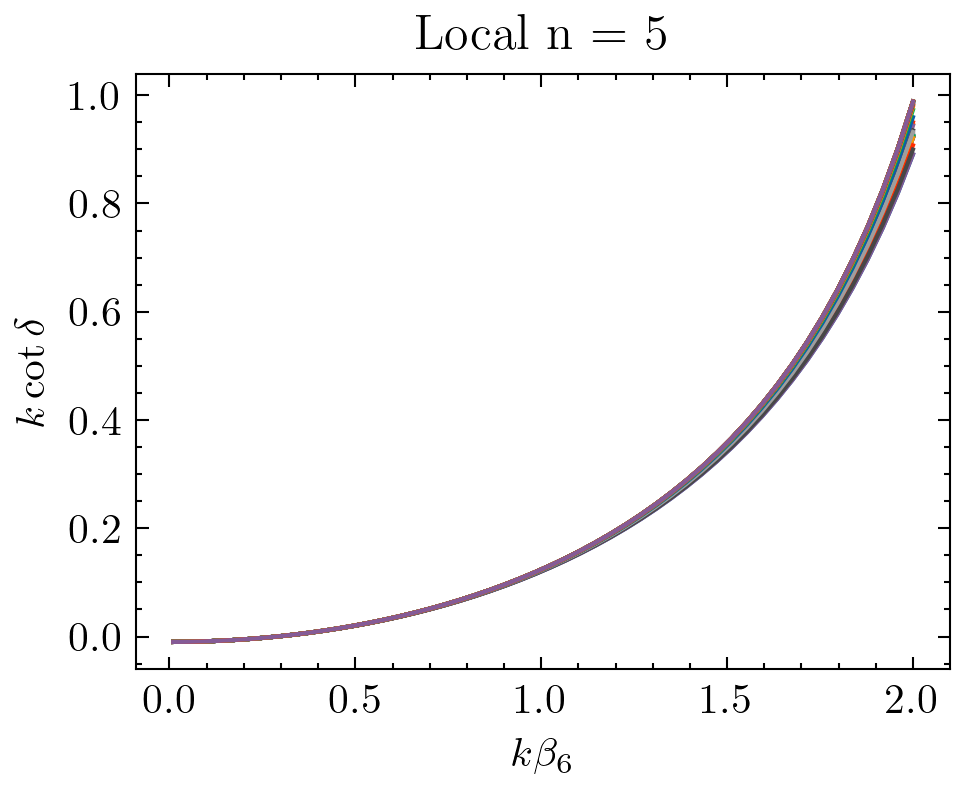

In [23]:
fig, ax = plt.subplots(dpi=300)
fig.patch.set_facecolor('white')

for row in kcds:
    ax.plot(ks*he4.BETA6, row)

# ax.set_ylim([-5, 2])
ax.set_xlabel(r'$k\beta_6$')
ax.set_ylabel(r'$k\cot\delta$')
ax.set_title(rf'Local n = {NUM_STATES}');